In [1]:
import numpy as np
import matplotlib.pyplot as plt
from files_sorting import Txt_Reading
import pandas as pd
import os

%matplotlib inline

# Unfolding

In [2]:
folder = "res/1nM/"
f_MAX = [10, 15, 20, 25, 30, 35]
colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
            "#e3b505","#95190c","#610345","#107e7d","#044b7f", 
            "#20bf55","#0b4f6c","#01baef","#fbfbff","#757575"]
markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x", 
           "d", "|", "_", "4", "P"]

res_unfold_1nM = pd.DataFrame(columns=["Molecule", "f", "f_next", "x_ssDNA", "N_nucleotides", "t_0", "c", "m"])
lengths = [0]

for i, f in enumerate(f_MAX):
    path = f'{folder}f_max{f}_unfolding.txt'
    if os.path.isfile(path):
        data = np.loadtxt(path)
        for j in range(data.shape[0]):
            res_unfold_1nM.loc[j+sum(lengths), :-2] = data[j] 
        res_unfold_1nM.iloc[sum(lengths):data.shape[0]+sum(lengths), -2] = [colors[i]] * data.shape[0]
        res_unfold_1nM.iloc[sum(lengths):data.shape[0]+sum(lengths), -1] = [markers[i]] * data.shape[0]
        lengths.append(data.shape[0])

res_unfold_1nM

c:\Users\ricta\Anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0,c,m
0,2.0,7.56,7.0025,14.604369,38.542428,3.1112,#7afdd6,D
1,2.0,5.4395,5.0314,9.660882,28.472324,6.65117,#7afdd6,D
2,2.0,8.0577,7.4737,15.244094,39.506498,11.20039,#7afdd6,D
3,2.0,6.3521,5.8411,13.132017,36.605534,14.60319,#7afdd6,D
4,2.0,3.8268,3.339,11.61299,39.933701,18.16394,#7afdd6,D
...,...,...,...,...,...,...,...,...
1230,21.0,5.1968,4.4999,19.707376,59.121414,363.80347,#613a3a,1
1231,21.0,5.2515,5.0906,5.108898,15.263353,375.37387,#613a3a,1
1232,21.0,6.0662,6.0861,1.806734,5.116574,387.39303,#613a3a,1
1233,21.0,5.9583,5.8339,4.31584,12.299794,399.26764,#613a3a,1


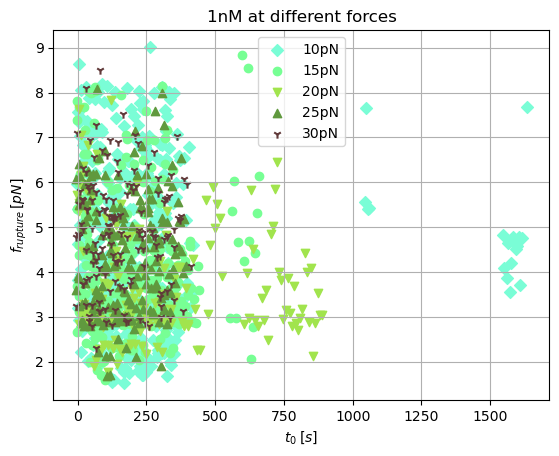

In [3]:
lengths = np.array(lengths).cumsum()
for i in range(res_unfold_1nM.shape[0]):
    label = f'{f_MAX[np.where(lengths == i)[0][0]]}pN' if i in lengths else ''
    plt.scatter(res_unfold_1nM.t_0[i], res_unfold_1nM.f[i], c=res_unfold_1nM.c[i], marker=res_unfold_1nM.m[i], label=label)
plt.grid()
plt.legend()
plt.xlabel('$t_0\\:[s]$')
plt.ylabel('$f_{rupture}\\: [pN]$')
plt.title("1nM at different forces")
plt.savefig("imgs/1nM/different_forces_unfolded.png", dpi=300, bbox_inches='tight')
plt.show()

In [4]:
folder = "res/4nM/"

res_unfold_4nM = pd.DataFrame(columns=["Molecule", "f", "f_next", "x_ssDNA", "N_nucleotides", "t_0", "c", "m"])
lengths = [0]

for i, f in enumerate(f_MAX):
    path = f'{folder}f_max{f}_unfolding.txt'
    if os.path.isfile(path):
        data = np.loadtxt(path)
        for j in range(data.shape[0]):
            res_unfold_4nM.loc[j+sum(lengths), :-2] = data[j] 
        res_unfold_4nM.iloc[sum(lengths):data.shape[0]+sum(lengths), -2] = [colors[i]] * data.shape[0]
        res_unfold_4nM.iloc[sum(lengths):data.shape[0]+sum(lengths), -1] = [markers[i]] * data.shape[0]
        lengths.append(data.shape[0])

res_unfold_4nM

c:\Users\ricta\Anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0,c,m
0,1.0,4.9012,4.8697,1.882425,5.782821,3.09766,#7afdd6,D
1,1.0,6.9669,7.0332,2.934062,7.936993,8.15332,#7afdd6,D
2,1.0,2.955,2.3627,16.530158,65.419369,11.80371,#7afdd6,D
3,1.0,3.0247,2.5004,13.308942,51.957643,16.41797,#7afdd6,D
4,1.0,3.0645,2.5469,12.509023,48.466768,20.89355,#7afdd6,D
...,...,...,...,...,...,...,...,...
778,18.0,6.9937,6.3019,18.404525,49.726831,4699.66272,#e3b505,8
779,18.0,3.6937,3.0366,14.273141,49.96519,4711.66419,#e3b505,8
780,18.0,4.2014,3.5692,15.00745,49.335568,4724.89954,#e3b505,8
781,18.0,3.7683,2.9039,20.79329,72.055789,4737.88831,#e3b505,8


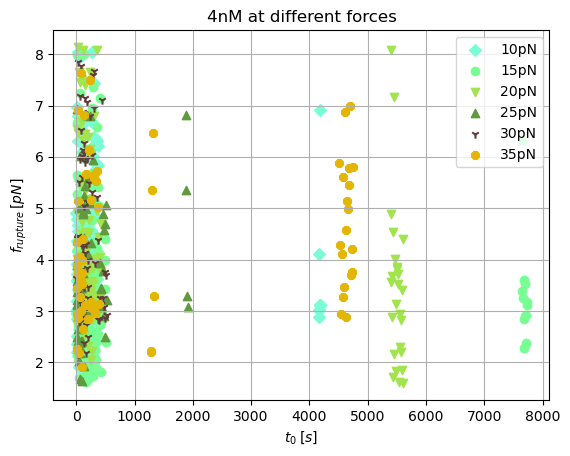

In [5]:
lengths = np.array(lengths).cumsum()
for i in range(res_unfold_4nM.shape[0]):
    label = f'{f_MAX[np.where(lengths == i)[0][0]]}pN' if i in lengths else ''
    plt.scatter(res_unfold_4nM.t_0[i], res_unfold_4nM.f[i], c=res_unfold_4nM.c[i], marker=res_unfold_4nM.m[i], label=label)
plt.grid()
plt.legend()
plt.xlabel('$t_0\\:[s]$')
plt.ylabel('$f_{rupture}\\: [pN]$')
plt.title("4nM at different forces")
plt.savefig("imgs/4nM/different_forces_unfolded.png", dpi=300, bbox_inches='tight')
plt.show()

In [6]:
folder = "res/10nM/"

res_unfold_10nM = pd.DataFrame(columns=["Molecule", "f", "f_next", "x_ssDNA", "N_nucleotides", "t_0", "c", "m"])
lengths = [0]

for i, f in enumerate(f_MAX):
    path = f'{folder}f_max{f}_unfolding.txt'
    if os.path.isfile(path):
        data = np.loadtxt(path)
        for j in range(data.shape[0]):
            res_unfold_10nM.loc[j+sum(lengths), :-2] = data[j] 
        res_unfold_10nM.iloc[sum(lengths):data.shape[0]+sum(lengths), -2] = [colors[i]] * data.shape[0]
        res_unfold_10nM.iloc[sum(lengths):data.shape[0]+sum(lengths), -1] = [markers[i]] * data.shape[0]
        lengths.append(data.shape[0])

res_unfold_10nM

c:\Users\ricta\Anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0,c,m
0,1.0,5.7448,5.237,12.030674,34.740219,-1.22559,#7afdd6,D
1,1.0,2.5243,2.0199,14.655128,63.911864,2.24316,#7afdd6,D
2,1.0,3.1913,3.2162,1.437594,5.442942,5.66113,#7afdd6,D
3,1.0,3.1316,3.261,3.621036,13.856946,13.95312,#7afdd6,D
4,1.0,4.2764,3.7289,13.357615,43.553846,18.50342,#7afdd6,D
...,...,...,...,...,...,...,...,...
796,17.0,5.1784,4.6906,11.124004,33.418578,497.3977,#e3b505,8
797,17.0,4.8117,4.7752,1.980037,6.129669,510.56836,#e3b505,8
798,17.0,4.0286,3.5706,12.184169,40.857854,523.49804,#e3b505,8
799,17.0,8.8468,8.568,6.823913,17.24872,537.42578,#e3b505,8


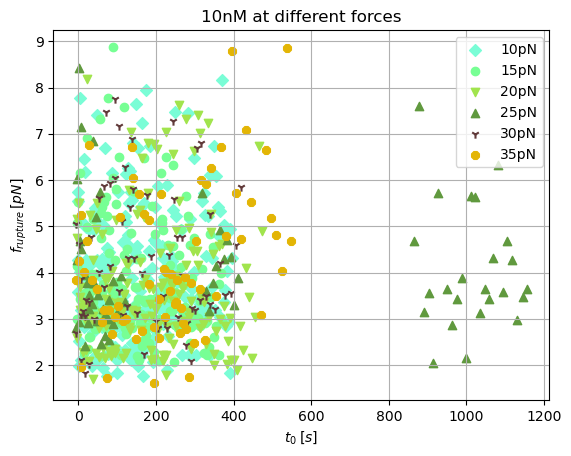

In [7]:
lengths = np.array(lengths).cumsum()
for i in range(res_unfold_10nM.shape[0]):
    label = f'{f_MAX[np.where(lengths == i)[0][0]]}pN' if i in lengths else ''
    plt.scatter(res_unfold_10nM.t_0[i], res_unfold_10nM.f[i], c=res_unfold_10nM.c[i], marker=res_unfold_10nM.m[i], label=label)
plt.grid()
plt.legend()
plt.xlabel('$t_0\\:[s]$')
plt.ylabel('$f_{rupture}\\: [pN]$')
plt.title("10nM at different forces")
plt.savefig("imgs/10nM/different_forces_unfolded.png", dpi=300, bbox_inches='tight')
plt.show()

# Different concentrations per force

In [8]:
folders = ["1nM", "4nM", "10nM"]
tot_lengths = [0]
res_unfold = pd.DataFrame(columns=["Molecule", "f", "f_next", "x_ssDNA", "N_nucleotides", "t_0", "c", "m"])

for i, f in enumerate(f_MAX):
    lengths = [0]
    for fold in folders:
        path = f'res/{fold}/f_max{f}_unfolding.txt'
        if os.path.isfile(path):
            data = np.loadtxt(path)
            for j in range(data.shape[0]):
                res_unfold.loc[j+tot_lengths[-1]+sum(lengths), :-2] = data[j] 
            res_unfold.iloc[tot_lengths[-1]+sum(lengths):data.shape[0]+tot_lengths[-1]+sum(lengths), -2] = [colors[i]] * data.shape[0]   # same color for the same force
            res_unfold.iloc[tot_lengths[-1]+sum(lengths):data.shape[0]+tot_lengths[-1]+sum(lengths), -1] = [markers[i]] * data.shape[0]  # same marker for the same force
            lengths.append(data.shape[0])

    tot_lengths.append(res_unfold.shape[0])

res_unfold

c:\Users\ricta\Anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0,c,m
0,2.0,7.56,7.0025,14.604369,38.542428,3.1112,#7afdd6,D
1,2.0,5.4395,5.0314,9.660882,28.472324,6.65117,#7afdd6,D
2,2.0,8.0577,7.4737,15.244094,39.506498,11.20039,#7afdd6,D
3,2.0,6.3521,5.8411,13.132017,36.605534,14.60319,#7afdd6,D
4,2.0,3.8268,3.339,11.61299,39.933701,18.16394,#7afdd6,D
...,...,...,...,...,...,...,...,...
2814,17.0,5.1784,4.6906,11.124004,33.418578,497.3977,#e3b505,8
2815,17.0,4.8117,4.7752,1.980037,6.129669,510.56836,#e3b505,8
2816,17.0,4.0286,3.5706,12.184169,40.857854,523.49804,#e3b505,8
2817,17.0,8.8468,8.568,6.823913,17.24872,537.42578,#e3b505,8


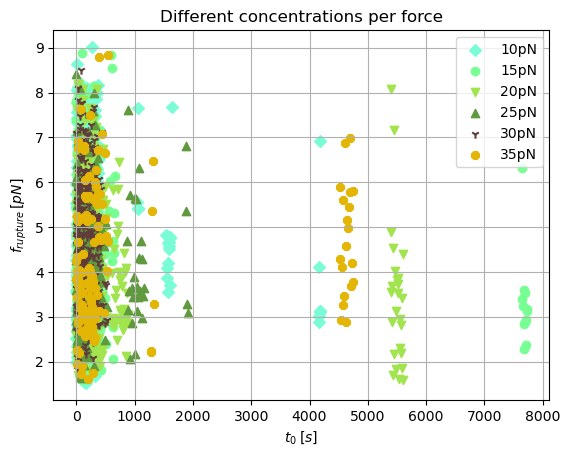

In [9]:
lengths = np.array(tot_lengths)
for i in range(res_unfold.shape[0]):
    label = f'{f_MAX[np.where(lengths == i)[0][0]]}pN' if i in lengths else ''
    plt.scatter(res_unfold.t_0[i], res_unfold.f[i], c=res_unfold.c[i], marker=res_unfold.m[i], label=label)
plt.grid()
plt.legend()
plt.xlabel('$t_0\\:[s]$')
plt.ylabel('$f_{rupture}\\: [pN]$')
plt.title("Different concentrations per force")
plt.savefig("imgs/different_concentrations_per_force_unfolded.png", dpi=300, bbox_inches='tight')
plt.show()

# Different forces per concentration

In [10]:
folders = ["1nM", "4nM", "10nM"]
tot_lengths = [0]
res_unfold = pd.DataFrame(columns=["Molecule", "f", "f_next", "x_ssDNA", "N_nucleotides", "t_0", "c", "m"])

for i, fold in enumerate(folders):
    lengths = [0]
    for f in f_MAX:
        path = f'res/{fold}/f_max{f}_unfolding.txt'
        if os.path.isfile(path):
            data = np.loadtxt(path)
            for j in range(data.shape[0]):
                res_unfold.loc[j+tot_lengths[-1]+sum(lengths), :-2] = data[j] 
            res_unfold.iloc[tot_lengths[-1]+sum(lengths):data.shape[0]+tot_lengths[-1]+sum(lengths), -2] = [colors[i]] * data.shape[0]   # same color for the same force
            res_unfold.iloc[tot_lengths[-1]+sum(lengths):data.shape[0]+tot_lengths[-1]+sum(lengths), -1] = [markers[i]] * data.shape[0]  # same marker for the same force
            lengths.append(data.shape[0])

    tot_lengths.append(res_unfold.shape[0])

res_unfold

c:\Users\ricta\Anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0,c,m
0,2.0,7.56,7.0025,14.604369,38.542428,3.1112,#7afdd6,D
1,2.0,5.4395,5.0314,9.660882,28.472324,6.65117,#7afdd6,D
2,2.0,8.0577,7.4737,15.244094,39.506498,11.20039,#7afdd6,D
3,2.0,6.3521,5.8411,13.132017,36.605534,14.60319,#7afdd6,D
4,2.0,3.8268,3.339,11.61299,39.933701,18.16394,#7afdd6,D
...,...,...,...,...,...,...,...,...
2814,17.0,5.1784,4.6906,11.124004,33.418578,497.3977,#a1e44d,v
2815,17.0,4.8117,4.7752,1.980037,6.129669,510.56836,#a1e44d,v
2816,17.0,4.0286,3.5706,12.184169,40.857854,523.49804,#a1e44d,v
2817,17.0,8.8468,8.568,6.823913,17.24872,537.42578,#a1e44d,v


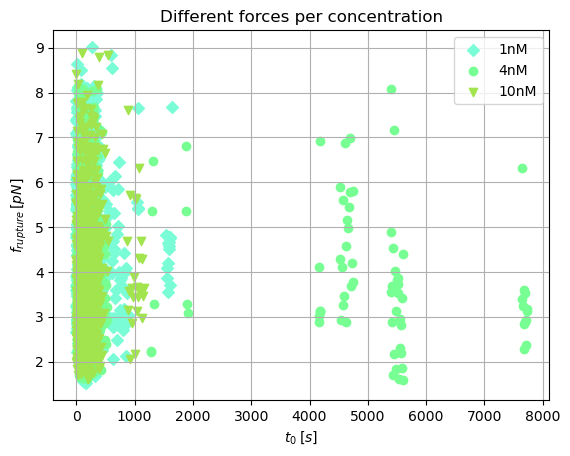

In [11]:
lengths = np.array(tot_lengths)
for i in range(res_unfold.shape[0]):
    label = f'{folders[np.where(lengths == i)[0][0]]}' if i in lengths else ''
    plt.scatter(res_unfold.t_0[i], res_unfold.f[i], c=res_unfold.c[i], marker=res_unfold.m[i], label=label)
plt.grid()
plt.legend()
plt.xlabel('$t_0\\:[s]$')
plt.ylabel('$f_{rupture}\\: [pN]$')
plt.title("Different forces per concentration")
plt.savefig("imgs/different_forces_per_concentration_unfolded.png", dpi=300, bbox_inches='tight')
plt.show()